In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sklearn

In [2]:
df=pd.read_csv('StressLevelDataset.csv')

In [3]:
ok=df.corr()
ok=ok['stress_level']
ok=ok.abs()
ok=ok.sort_values(ascending=False)
ok=ok.head(11)

In [4]:
lis=[
'self_esteem',
'bullying',
'sleep_quality',
'future_career_concerns',
'anxiety_level',
'depression',
'academic_performance',
'headache',
'safety',
'basic_needs','stress_level']

df=df[lis]

In [10]:
df

,self_esteem,bullying,sleep_quality,future_career_concerns,anxiety_level,depression,academic_performance,headache,safety,basic_needs,stress_level
0,20,2,2,3,14,11,3,2,3,2,1
1,8,5,1,5,15,15,1,5,2,2,2
2,18,2,2,2,12,14,2,2,3,2,1
3,12,5,1,4,16,15,2,4,2,2,2
4,28,5,5,2,16,7,4,2,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...
1095,17,3,3,3,11,14,2,3,2,3,1
1096,12,3,0,1,9,8,0,0,3,4,2
1097,26,1,5,1,4,3,5,1,4,4,0
1098,0,4,1,4,21,19,2,5,1,1,2


In [13]:
df.describe()

,self_esteem,bullying,sleep_quality,future_career_concerns,anxiety_level,depression,academic_performance,headache,safety,basic_needs,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,17.777273,2.617273,2.660000,2.649091,11.063636,12.555455,2.772727,2.508182,2.737273,2.772727,0.996364
std,8.944599,1.530958,1.548383,1.529375,6.117558,7.727008,1.414594,1.409356,1.406171,1.433761,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,1.000000,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,2.000000,2.000000,0.000000
50%,19.000000,3.000000,2.500000,2.000000,11.000000,12.000000,2.000000,3.000000,2.000000,3.000000,1.000000
75%,26.000000,4.000000,4.000000,4.000000,16.000000,19.000000,4.000000,3.000000,4.000000,4.000000,2.000000
max,30.000000,5.000000,5.000000,5.000000,21.000000,27.000000,5.000000,5.000000,5.000000,5.000000,2.000000


<Axes: xlabel='stress_level', ylabel='self_esteem'>

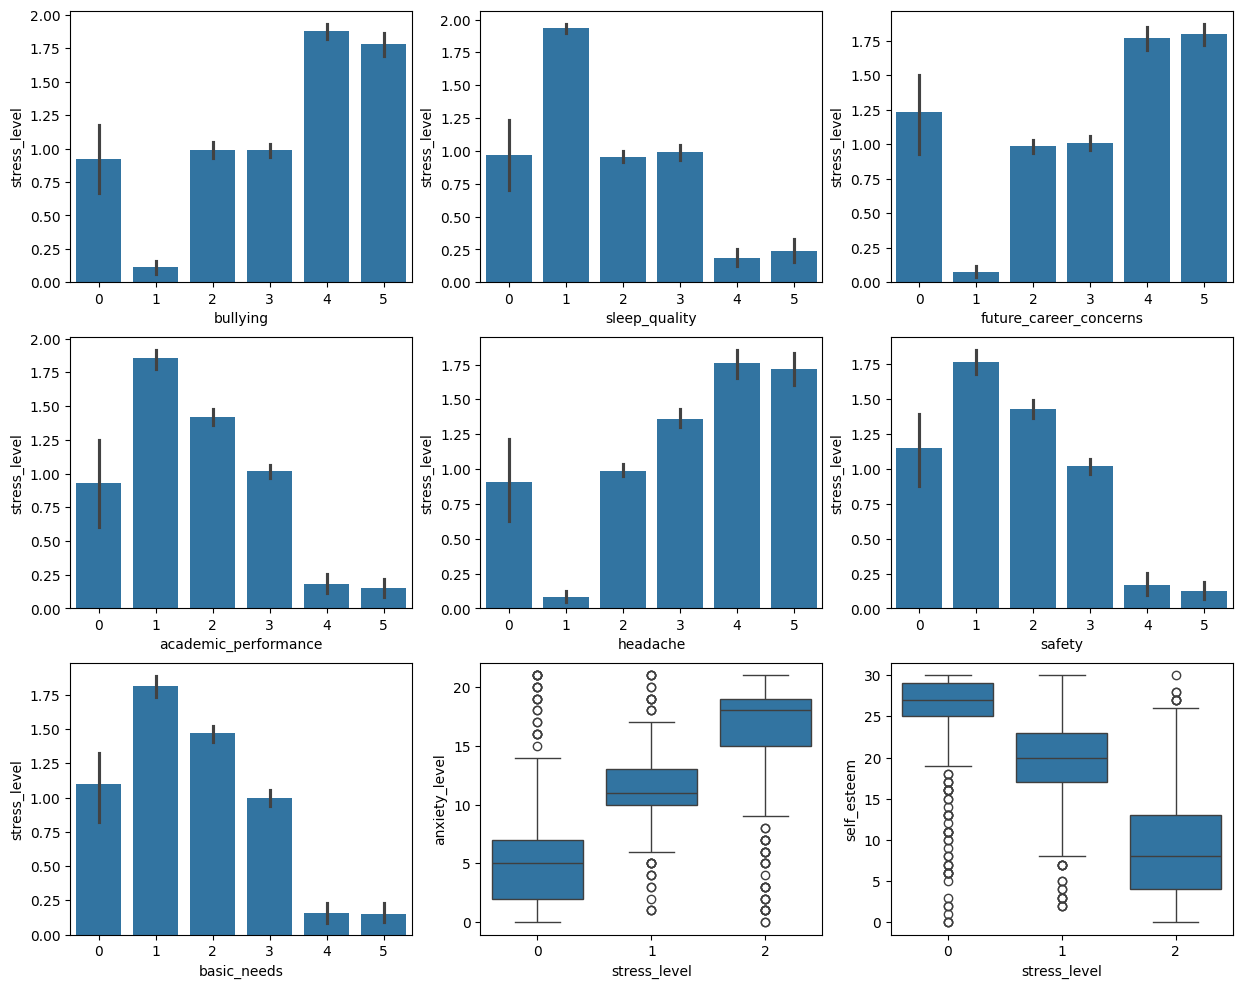

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid

sns.barplot(x='bullying',y='stress_level',data=df,ax=axes[0,0])
sns.barplot(x='sleep_quality',y='stress_level',data=df,ax=axes[0,1])
sns.barplot(x='future_career_concerns',y='stress_level',data=df,ax=axes[0,2])
sns.barplot(x='academic_performance',y='stress_level',data=df,ax=axes[1,0])
sns.barplot(x='headache',y='stress_level',data=df,ax=axes[1,1])
sns.barplot(x='safety',y='stress_level',data=df,ax=axes[1,2])
sns.barplot(x='basic_needs',y='stress_level',data=df,ax=axes[2,0])
sns.boxplot(y='anxiety_level',x='stress_level',data=df,ax=axes[2,1])
sns.boxplot(y='self_esteem',x='stress_level',data=df,ax=axes[2,2])

In [7]:
lis=[
'self_esteem','bullying','sleep_quality','future_career_concerns','anxiety_level','depression','academic_performance','headache','safety','basic_needs']
x_input=df[lis]
y_input=df['stress_level']

In [ ]:
x_train=x_input.to_numpy()
y_train=y_input.to_numpy()

In [9]:
def std_mu(x):
    mu=np.mean(x,axis=0)
    std=np.std(x,axis=0)
    std[std==0]=1.
    return mu,std
def normalize(x,mu,std):
    return (x-mu)/std

In [14]:
def take_input(answers):
    return answers